In [1]:
import numpy as np
from matplotlib import pyplot as plt
import msprime

In [ ]:
# msprime functions to simulate data from input demographic model parameters
def msprime_three_epoch(demog_param):
    '''
    This function defines demography for msprime based on input parameters.
    Input: n0,n1,n2 are population sizes; t1,t2 are times of population size change.
    Output: demographic history model
    '''
    n0, t1, n1, t2, n2 = demog_param
    dem = msprime.Demography()
    dem.add_population(name="A", initial_size=n0) # present size
    dem.add_population_parameters_change(time=t1, # time of recent size change
                                        initial_size=n1) # size of middle pop
    dem.add_population_parameters_change(time=t2, # time of oldest change
                                        initial_size=n2) # size of ancestral pop
    return dem

def msprime_sim_mts(dem, seed=12):
    '''
    This function defines the other population parameters needed for simulation,
    such as sample size, ploidy, sequence length, recombination and mutation rates.
    These parameters are fixed, values shown below.
    Input: demographic model defined by the function above, and a random seed for
    reproducibility.
    Output: simulated msprime tree sequence with mutations
    '''
    ns = {"A": 11} # 11 diploid individuals = 22 haploids
    ploidy=2
    seq_l=1500000
    recomb=1e-8
    # simulate tree sequence
    ts = msprime.sim_ancestry(samples=ns, ploidy=ploidy, demography=dem,
                                sequence_length=seq_l,
                                recombination_rate=recomb,
                                random_seed=seed)
    # add mutation
    mut=1.2e-8/10
    mts = msprime.sim_mutations(ts, rate=mut, 
                                random_seed=seed)
    return mts

In [ ]:
# simulate an example demographic history and the corresponding data
# specify the values of 5 demographic model parameters n0, t1, n1, t2, n2
p=[5461.133340084809,556.837086339723,758.384796150766,
   1027.9775764890148,2773.8484578367843]

# simulate data
mts = msprime_sim_mts(msprime_three_epoch(p))

# get haplotype matrix
haps = mts.genotype_matrix().T

# preprocessing steps
new_haps = haps.copy()
# convert 1 to 225 for visualizing with colors
new_haps[new_haps == 1] = 225
# reduce the number of segregating sites (columns) for visualization
new_haps = new_haps[:,:40]

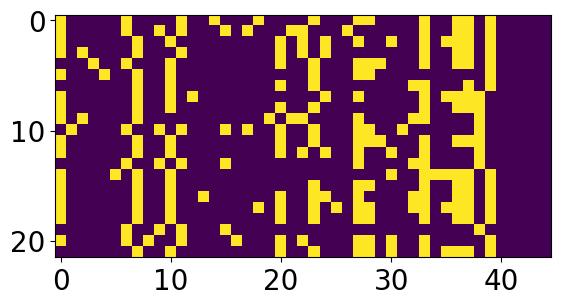

In [ ]:
# visualize original data, no disruption
# add 5 zero-padding columns to example
pad_arr = np.zeros((22,5))
# plot
plt.rcParams.update({'font.size': 20})
plt.imshow(np.column_stack((new_haps,pad_arr)))

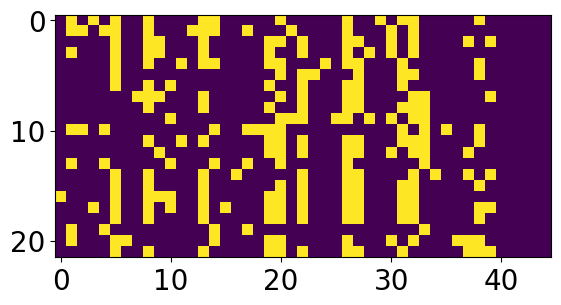

In [5]:
# disrupt genomic positions: permute columns
arr = new_haps.T
np.random.shuffle(arr)
# plot
plt.imshow(np.column_stack((arr.T,pad_arr)))

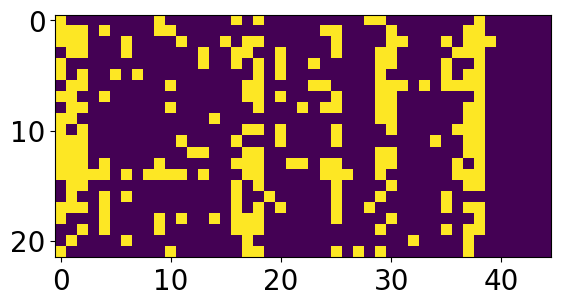

In [6]:
# disrupt haplotype/LD: permute columns and entries within columns
arr = new_haps.T
np.random.shuffle(arr)
for j in range(arr.shape[0]):
    # shuffle within each rows, which are snp columns
    np.random.shuffle(arr[j])
# plot
plt.imshow(np.column_stack((arr.T,pad_arr)))

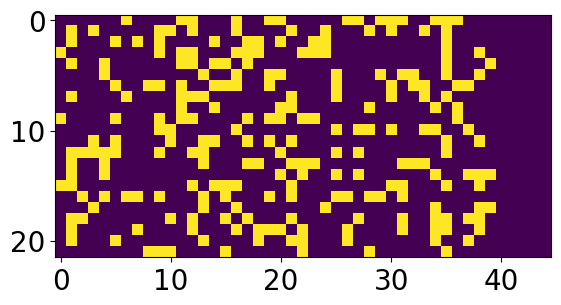

In [ ]:
# disrupt AF: permute all entries
# reshape to 1D arr, then shuffle, which is equivalent 
# to random shuffle all entries
rows, cols = new_haps.shape
arr = new_haps.reshape(rows * cols)
np.random.shuffle(arr)
# reshape back to 2D
arr = arr.reshape(rows, cols)
# plot
plt.imshow(np.column_stack((arr,pad_arr)))

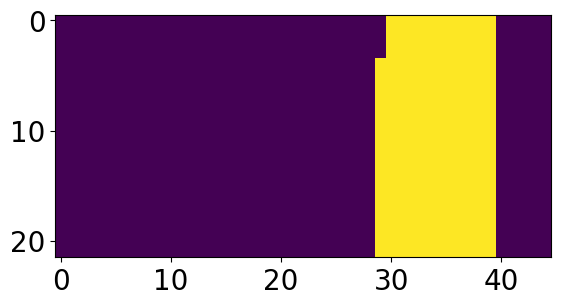

In [ ]:
# disrupt mediant AF, keep padding by grouping all alternate alleles right
# count # of non-zero entries (alternate allele entries)
num_ones = np.count_nonzero(new_haps)
# make new 1D arr with the counts of two entry groups: zeros and ones
# zeros = # total entries - ones
arr = np.concatenate([np.zeros(rows * cols - num_ones), np.ones(num_ones)])
# reshape to 2D arr, convert 1s to 225 for visualizing with color
arr = (arr*255).astype('uint8').reshape((cols, rows)).T
# plot
plt.imshow(np.column_stack((arr,pad_arr)))

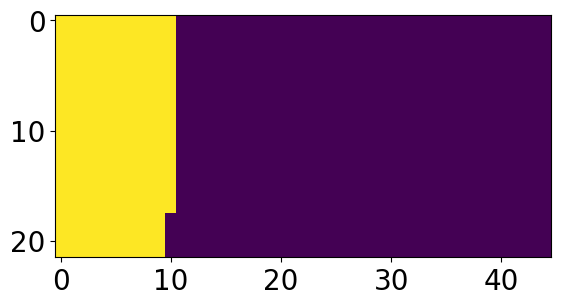

In [ ]:
# disrupt padding bound: group all alternate alleles left
# make new 1D arr to shuffle, similar to above but switch 
# order of zeros and ones group
arr = np.concatenate([np.ones(num_ones), np.zeros(rows * cols - num_ones)])
# reshape to 2D arr, convert 1s to 225 for visualizing with color
arr = (arr*255).astype('uint8').reshape((cols, rows)).T
# plot
plt.imshow(np.column_stack((arr,pad_arr)))
